In [4]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as nr
from random import random
from numpy import arange
import time

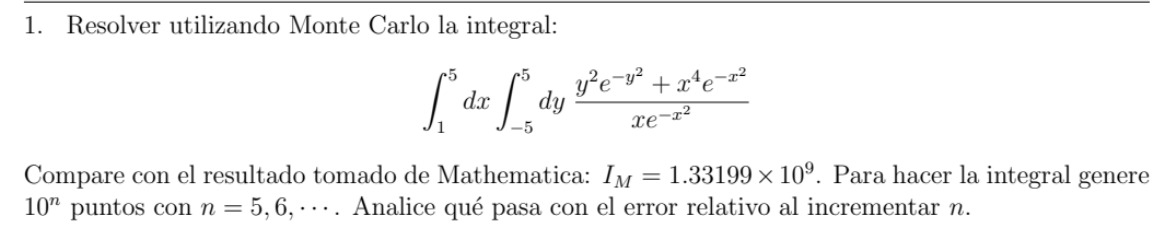

In [2]:
funcion = lambda x,y: ((y**2)*np.exp(-y**2)+(x**4)*np.exp(-x**2))/(x*np.exp(-x**2))
a_x = 5
b_x = 1

a_y = 5
b_y = -5

In [3]:
def npmedio(f,a_x,b_x,a_y,b_y,N,*params):
    x = (b_x-a_x)*np.random.random(N)+a_x
    y = (b_y-a_y)*np.random.random(N)+a_y
    I = (b_x-a_x)*(b_y-a_y)*np.sum(f(x,y))/N
    return I

In [4]:
#Valor medio para sen^2
n1, n2, n3 = 5, 6, 7

startTime = time.process_time()
N = 10**n1
I = npmedio(funcion,a_x,b_x,a_y,b_y,N)
Iexacto= 1.33199*(10**9)
eabs = np.abs(I-Iexacto)
endTime = time.process_time()
print("Valor medio")
print('I = ',I,'erel = ',eabs/np.abs(Iexacto))
print('tiempo de computo = ',round(endTime-startTime,2),' s')

Valor medio
I =  1319618725.003293 erel =  0.009287813719852973
tiempo de computo =  0.01  s


In [5]:
startTime = time.process_time()
N = 10**n2
I = npmedio(funcion,a_x,b_x,a_y,b_y,N)
Iexacto= 1.33199*(10**9)
eabs = np.abs(I-Iexacto)
endTime = time.process_time()
print("Valor medio")
print('I = ',I,'erel = ',eabs/np.abs(Iexacto))
print('tiempo de computo = ',round(endTime-startTime,2),' s')

Valor medio
I =  1335433055.0116692 erel =  0.0025848955410094363
tiempo de computo =  0.08  s


In [6]:
startTime = time.process_time()
N = 10**n3
I = npmedio(funcion,a_x,b_x,a_y,b_y,N)
Iexacto= 1.33199*(10**9)
eabs = np.abs(I-Iexacto)
endTime = time.process_time()
print("Valor medio")
print('I = ',I,'erel = ',eabs/np.abs(Iexacto))
print('tiempo de computo = ',round(endTime-startTime,2),' s')

Valor medio
I =  1332285914.272589 erel =  0.00022215953016837083
tiempo de computo =  0.79  s


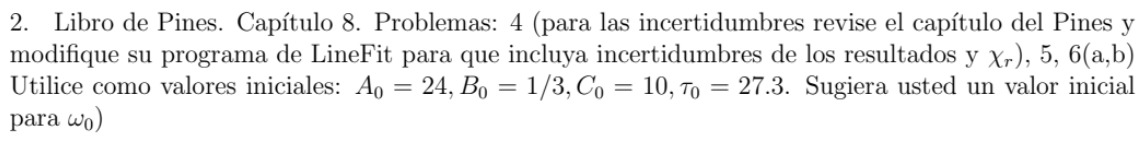

In [9]:
NTl = 1000 #Numero de atomos de Tl
NPb = 0 #Numero de atomos de Pb
h = 1  # intervalo de tiempo
tau = 3.053*60  #tiempo de vida media
p = 1 - 2**(-h/tau) #probabilidad de decaimiento

NTalios = [NTl]
NPlomos = [NPb]
tmax = 1000 

for _ in range(1,tmax,h):   
    decays = 0 #Cuenta el número de ´átomos que decayeron en el tiempo t
    for i in range(NTl):
        r = nr.random()
        if r < p: #Moneda sesgada
            decays += 1
    NTl -= decays
    NPb += decays
    NTalios.append(NTl)
    NPlomos.append(NPb)

tpoints = np.arange(0,tmax,h)

In [15]:
#Incertidumbre ejercicio 
def lineFit(x, y, N0, tau):
    ''' Returns slope and y-intercept of linear fit to (x,y)
    data set'''
    Inc_N0 = 1/NTl
    Inc_T = 1/(tau**2)
    xavg = x.mean() 
    slope = (y * (x - xavg)).sum() / (x * (x - xavg)).sum()
    yint = y.mean() - slope * xavg
    return yint, slope, Inc_N0, Inc_T

In [14]:
b,a = lineFit(tpoints,np.log(NTalios), NTL, tau)

NameError: name 'tpoints' is not defined

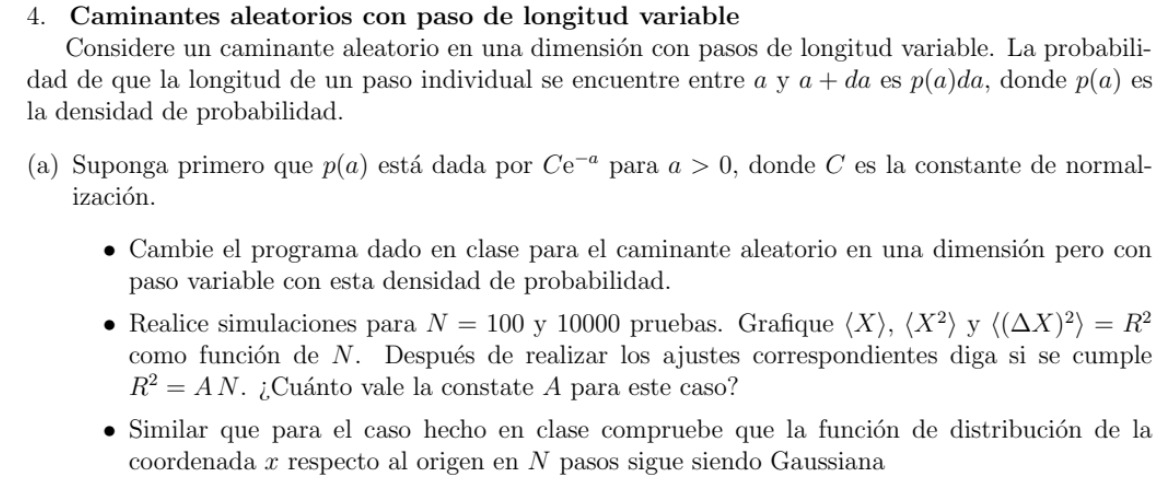

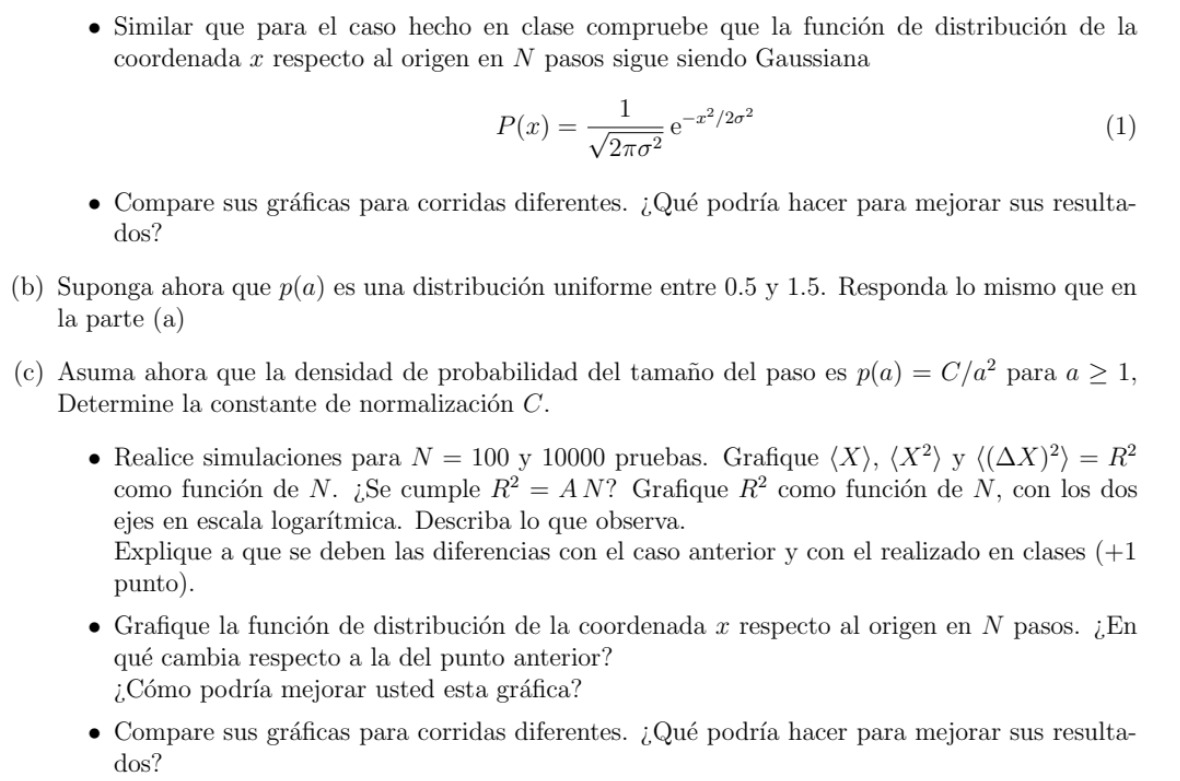

In [33]:
def lineFit(x, y):
    ''' Returns slope and y-intercept of linear fit to (x,y)
    data set'''
    xavg = x.mean()
    slope = (y * (x - xavg)).sum() / (x * (x - xavg)).sum()
    yint = y.mean() - slope * xavg
    return slope, yint

In [34]:
def calcprob():
    a = np.random.random()
    p_a = np.exp(-a)
    return p_a

In [71]:
def CamAlead1(N,M,p,peso):
    #peso: calcprob() probabilidad de la distancia recorrida en un paso 
    #MANDAR P_A
    # N: Número total de pasos
    # M: Número de caminantes
    # p: probabilidad de paso a la derecha
    #print(peso)
    dx = np.random.rand(M,N)
    #print("1dx",dx,"\n\n")
    dp = np.exp(-np.random.rand(M,N)) #Matriz de magnitud de desplazamiento pesado
   # print("dp", dp, "\n\n")
    dx[dx<p] = 1
    dx[dx != 1] = -1 
    #print("2dx",dx,"\n\n")
    dx = dx*dp #Multiplicar los pasos adelante y atrás por la distancia pesada (dp)
    #print("3dx",dx,"\n\n")
    X=np.cumsum(dx,axis=1)
    X2=X**2

    XparaN = X[:,N-1]
    X = X.mean(axis=0)
    print("1X", X)
    X2 = X2.mean(axis=0)
    #print(calcprob())

    X = np.append(0.,X)
    print("2X", X)
    X2 = np.append(0.,X2)
    DX2 = X2 - X*X 
    return X,DX2,XparaN

In [72]:
startTime = time.process_time()
N = 100 #numero de pasos del caminante
trials = 1000  #numero de realizaciones
p = 0.5 #probabilidad de paso a la derecha

X,DX2,XparaN = CamAlead1(N,trials,p, calcprob())

endTime = time.process_time()
print('Duración= {} s.'.format(endTime-startTime))

1X [ 0.03395759  0.02236538  0.02494284  0.04703238  0.03967653  0.05381961
  0.04829087  0.03055336  0.02737469  0.03454658  0.02784156  0.04879302
  0.04466602  0.02963193  0.02652002  0.00497582  0.0293903   0.03261138
  0.01960734  0.02926012  0.01702853  0.01048751  0.00146692  0.03337518
  0.02403344  0.05451065  0.03782531  0.05384886  0.05423921  0.06955387
  0.06632466  0.04459061  0.03694928  0.0147942   0.03458631  0.07981996
  0.07259414  0.05465209  0.0832929   0.09618257  0.0584773   0.04777726
  0.04209247  0.05174068  0.09690166  0.07806086  0.05032521  0.03728173
  0.02057242  0.00663638  0.01690627 -0.01115693  0.0082425   0.00964704
  0.018567    0.03914918  0.04162364  0.0330893   0.02753751  0.05397224
  0.07702752  0.0702151   0.07249782  0.06513064  0.08001256  0.07470239
  0.06344206  0.04903915  0.04784155  0.00270687  0.05730268  0.07488931
  0.0884975   0.06682826  0.07439655  0.07069701  0.07569729  0.0855055
  0.09324074  0.09245596  0.0829943   0.09346152 

slope (A) =  0.4313267977195336
corte =  0.14084398833656664


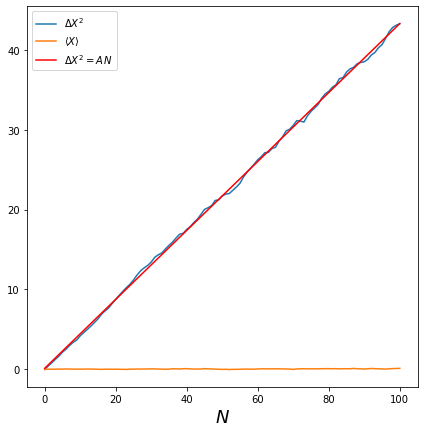

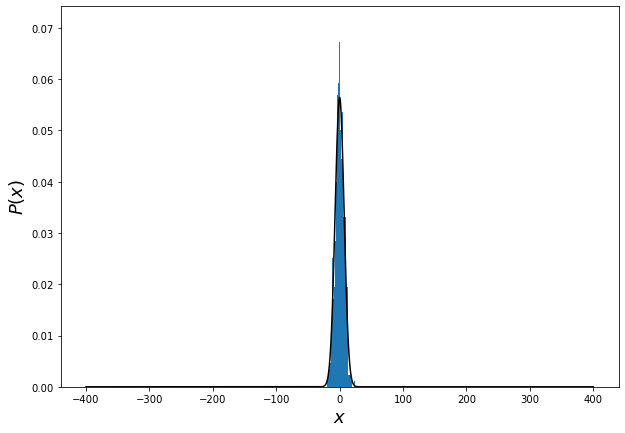

In [76]:
plt.figure(figsize = (7,7))
plt.plot(DX2,label = r'$\Delta X^2$')
plt.plot(X,label = r'$\langle X \rangle$')
plt.xlabel(r'$N$',fontsize = 18)

t = np.arange(0,N+1)

slope, corte = lineFit(t,DX2)
plt.plot(t,slope*t+corte,color = 'red',label = r'$\Delta X^2 = A\, N$')
print('slope (A) = ',slope)
print('corte = ',corte)
plt.legend(loc = 'upper left')
plt.show()

plt.figure(figsize = (10,7))
n, bins, patches = plt.hist(XparaN, bins = 50,density = True) # density = True, funcion de distribucion
sigma2 = (1/N) * (np.sum((t - X)**2)) #t es el número de pasos
sigma2 =N/2 
x = np.arange(-400,400,0.1)
Prob = np.exp(-x**2/(2*sigma2))/np.sqrt(2*np.pi*(sigma2))
#plt.text(100,0.75*n.max(),r'$ P(x) = \displaystyle\frac{1}{\sqrt{2\pi N}}\,\mbox{e}^{\displaystyle -x^2/2N}$',fontsize = 16)
plt.plot(x,Prob,color = 'black')
plt.xlabel(r'$x$',fontsize = 18)
plt.ylabel(r'$P(x)$',fontsize = 18)
plt.show()
#print("\n A = ", np.mean((slope*t+corte))/t)

## b)

In [77]:
def CamAlead1(N,M,p,peso):
    #peso: calcprob() probabilidad de la distancia recorrida en un paso 
    #MANDAR P_A
    # N: Número total de pasos
    # M: Número de caminantes
    # p: probabilidad de paso a la derecha
    #print(peso)
    dx = np.random.rand(M,N)
    #print("1dx",dx,"\n\n")
    dp = np.random.uniform(0.5, 1.5, (M,N)) #Matriz de magnitud de desplazamiento pesado
   # print("dp", dp, "\n\n")
    dx[dx<p] = 1
    dx[dx != 1] = -1 
    #print("2dx",dx,"\n\n")
    dx = dx*dp #Multiplicar los pasos adelante y atrás por la distancia pesada (dp)
    #print("3dx",dx,"\n\n")
    X=np.cumsum(dx,axis=1)
    X2=X**2

    XparaN = X[:,N-1]
    X = X.mean(axis=0)
    print("1X", X)
    X2 = X2.mean(axis=0)
    #print(calcprob())

    X = np.append(0.,X)
    print("2X", X)
    X2 = np.append(0.,X2)
    DX2 = X2 - X*X 
    return X,DX2,XparaN

In [78]:
startTime = time.process_time()
N = 100 #numero de pasos del caminante
trials = 1000  #numero de realizaciones
p = 0.5 #probabilidad de paso a la derecha

X,DX2,XparaN = CamAlead1(N,trials,p, calcprob())

endTime = time.process_time()
print('Duración= {} s.'.format(endTime-startTime))

1X [ 0.03920949  0.0602378   0.11241145  0.12971483  0.14996157  0.19819766
  0.17092817  0.19894598  0.19193366  0.18454959  0.20932387  0.17268237
  0.17766542  0.15502164  0.13025567  0.10937563  0.04936646  0.0159136
  0.06423692  0.07384441  0.07214008  0.08696327  0.04289472  0.09944764
  0.08464519  0.07698013  0.06498173  0.00968906  0.03249149  0.03157057
  0.06061892  0.05999264  0.01908188 -0.01160208  0.05341398  0.0006432
 -0.04720403 -0.0559474  -0.10146167 -0.11513266 -0.08366765 -0.11901699
 -0.13488142 -0.16358483 -0.14618564 -0.12806173 -0.0485559  -0.0325092
  0.00698645 -0.01017725 -0.01068815 -0.00772668  0.0356832   0.02610852
  0.03458677  0.07250695  0.01884778 -0.03358817  0.00628641 -0.00790364
 -0.05171843 -0.02625862 -0.03206684 -0.00240398 -0.02383141  0.05472443
  0.08078179  0.10814786  0.10844493  0.12466721  0.09753246  0.10618641
  0.12936401  0.15153251  0.18466569  0.215854    0.17724769  0.17549974
  0.16263015  0.16454193  0.18882917  0.23142269  0

slope (A) =  1.0664128322853947
corte =  1.5984769604233904


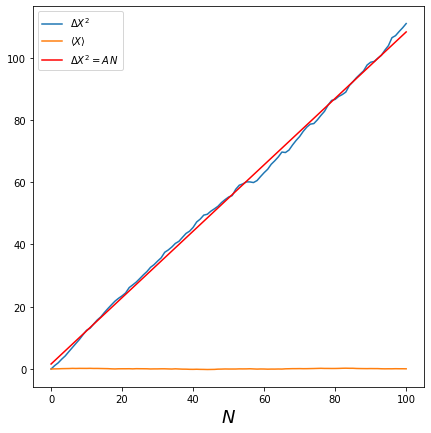

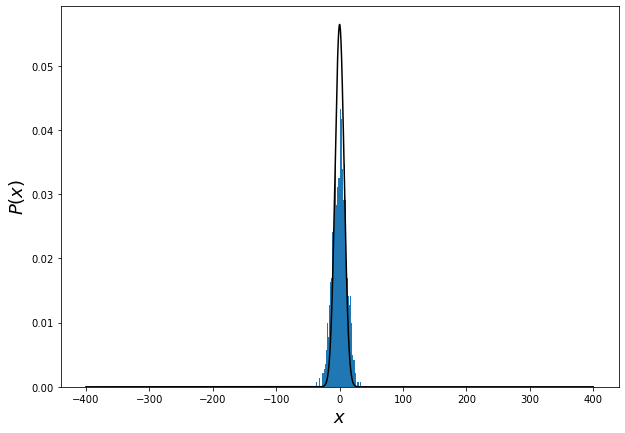

In [79]:
plt.figure(figsize = (7,7))
plt.plot(DX2,label = r'$\Delta X^2$')
plt.plot(X,label = r'$\langle X \rangle$')
plt.xlabel(r'$N$',fontsize = 18)

t = np.arange(0,N+1)

slope, corte = lineFit(t,DX2)
plt.plot(t,slope*t+corte,color = 'red',label = r'$\Delta X^2 = A\, N$')
print('slope (A) = ',slope)
print('corte = ',corte)
plt.legend(loc = 'upper left')
plt.show()

plt.figure(figsize = (10,7))
n, bins, patches = plt.hist(XparaN, bins = 50,density = True) # density = True, funcion de distribucion
sigma2 = (1/N) * (np.sum((t - X)**2)) #t es el número de pasos
sigma2 =N/2 
x = np.arange(-400,400,0.1)
Prob = np.exp(-x**2/(2*sigma2))/np.sqrt(2*np.pi*(sigma2))
#plt.text(100,0.75*n.max(),r'$ P(x) = \displaystyle\frac{1}{\sqrt{2\pi N}}\,\mbox{e}^{\displaystyle -x^2/2N}$',fontsize = 16)
plt.plot(x,Prob,color = 'black')
plt.xlabel(r'$x$',fontsize = 18)
plt.ylabel(r'$P(x)$',fontsize = 18)
plt.show()
#print("\n A = ", np.mean((slope*t+corte))/t)